In [63]:


"""
Program1 : Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis 
based on a given set of training data samples. Read the training data from a .CSV file.

Algorithm :
1. Initialize h to the most specific hypothesis in H
2. For each positive training instance x
• For each attribute constraint ai in h
If the constraint ai in h is satisfied by x then do nothing
else replace ai in h by the next more general constraint that is satisfied by x
3. Output hypothesis h
"""

import random
import csv


attributes = [['Sunny','Rainy'],
              ['Warm','Cold'],
              ['Normal','High'],
              ['Strong','Weak'],
              ['Warm','Cool'],  
              ['Same','Change']]


num_attributes = len(attributes)


print (" \n The most general hypothesis : ['?','?','?','?','?','?']\n")
print ("\n The most specific hypothesis : ['0','0','0','0','0','0']\n")

a = []
print("\n The Given Training Data Set \n")

with open(r'C:\Users\risha\Desktop\ws.csv') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        a.append (row)
        print(row)


print("\n The initial value of hypothesis: ")
hypothesis = ['0'] * num_attributes
print(hypothesis)

# Comparing with First Training Example 
for j in range(0,num_attributes):
        hypothesis[j] = a[0][j]

# Comparing with Remaining Training Examples of Given Data Set

print("\n Find S: Finding a Maximally Specific Hypothesis\n")

for i in range(0,len(a)):
    if a[i][num_attributes]=='Yes':
            for j in range(0,num_attributes):
                if a[i][j]!=hypothesis[j]:
                    hypothesis[j]='?'
                else :
                    hypothesis[j]= a[i][j] 
    print(" For Training Example No :{0} the hypothesis is ".format(i),hypothesis)
                
print("\n The Maximally Specific Hypothesis for a given Training Examples :\n")
print(hypothesis)   
    


 
 The most general hypothesis : ['?','?','?','?','?','?']


 The most specific hypothesis : ['0','0','0','0','0','0']


 The Given Training Data Set 

['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes']
['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes']
['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No']
['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']

 The initial value of hypothesis: 
['0', '0', '0', '0', '0', '0']

 Find S: Finding a Maximally Specific Hypothesis

 For Training Example No :0 the hypothesis is  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
 For Training Example No :1 the hypothesis is  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
 For Training Example No :2 the hypothesis is  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
 For Training Example No :3 the hypothesis is  ['Sunny', 'Warm', '?', 'Strong', '?', '?']

 The Maximally Specific Hypothesis for a given Training Examples :

['Sunny', 'Warm', '?', 'Strong', '?',

In [64]:
""" Problem 2: For a given set of training data examples stored in a .CSV file,
implement and demonstrate the Candidate-Elimination algorithm to output a description
of the set of all hypotheses consistent with the training examples.

Algorithm:

G <-- maximally general hypotheses in H
S <- maximally specific hypotheses in H
For each training example d=<x,c(x)>
Case 1 : If d is a positive example
         Remove from G any hypothesis that is inconsistent with d
            For each hypothesis s in S that is not consistent with d
            • Remove s from S.
            • Add to S all minimal generalizations h of s such that
                • h consistent with d
                • Some member of G is more general than h
            • Remove from S any hypothesis that is more general than another hypothesis in S


Case 2: If d is a negative example
        Remove from S any hypothesis that is inconsistent with d
        For each hypothesis g in G that is not consistent with d
        • Remove g from G.
        • Add to G all minimal specializations h of g such that
            o h consistent with d
            o Some member of S is more specific than h
        • Remove from G any hypothesis that is less general than another hypothesis in G

"""

import random
import csv

#-------------------------------------------------
def g_0(n):
    return ("?",)*n

def s_0(n):
    return ('0',)*n  



#---------------------------------
def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == "?" or (x != "0" and (x == y or y == "0"))
        more_general_parts.append(mg)
    return all(more_general_parts)

l1 = [1, 2, 3]
l2 = [3, 4, 5]

print(list(zip(l1, l2)))




# min_generalizations
def fulfills(example, hypothesis):
    ### the implementation is the same as for hypotheses:
    return more_general(hypothesis, example)

def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not fulfills(x[i:i+1], h[i:i+1]):
            h_new[i] = '?' if h[i] != '0' else x[i]
    return [tuple(h_new)]

#--------------------------------

min_generalizations(h=('0', '0'  , 'sunny'), 
                    x=('rainy', 'windy', 'cloudy'))


#----------------------------------

def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == "?":
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != "0":
            h_new = h[:i] + ('0',) + h[i+1:]
            results.append(h_new)
    return results


#-----------------------------------

min_specializations(h=('?', 'x',), 
                    domains=[['a', 'b', 'c'], ['x', 'y']], 
                    x=('b', 'x'))

#------------------------------------

with open(r'C:\Users\risha\Desktop\wsce.csv')  as csvFile:
        examples = [tuple(line) for line in csv.reader(csvFile)]

a=[]
#examples = [('sunny', 'warm', 'normal', 'strong', 'warm', 'same',True),
# ('sunny', 'warm', 'high', 'strong', 'warm', 'same',True),
# ('rainy', 'cold', 'high', 'strong', 'warm', 'change',False),
# ('sunny', 'warm', 'high', 'strong', 'cool', 'change',True)]
for row in examples:
    a.append(row)
    print(row)


#----------------------------------------------------------------------


def get_domains(examples):
    d = [set() for i in examples[0]]
    for x in examples:
        for i, xi in enumerate(x):
            d[i].add(xi)
    return [list(sorted(x)) for x in d]

get_domains(examples)

#--------------------------------------------

def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]
    
    G = set([g_0(len(domains))])
    S = set([s_0(len(domains))])
    i=0
    print("\n G[{0}]:".format(i),G)
    print("\n S[{0}]:".format(i),S)
    for xcx in examples:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]  # Splitting data into attributes and decisions
        if cx=='Y': # x is positive example
            G = {g for g in G if fulfills(x, g)}
            S = generalize_S(x, G, S)
        else: # x is negative example
            S = {s for s in S if not fulfills(x, s)}
            G = specialize_G(x, domains, G, S)
        print("\n G[{0}]:".format(i),G)
        print("\n S[{0}]:".format(i),S)
    return 

#---------------------------------------------

def generalize_S(x, G, S):
    S_prev = list(S)
    for s in S_prev:
        if s not in S:
            continue
        if not fulfills(x, s):
            S.remove(s)
            Splus = min_generalizations(s, x)
            ## keep only generalizations that have a counterpart in G
            S.update([h for h in Splus if any([more_general(g,h) 
                                               for g in G])])
            ## remove hypotheses less specific than any other in S
            S.difference_update([h for h in S if 
                                 any([more_general(h, h1) 
                                      for h1 in S if h != h1])])
    return S

#------------------------------------------------


def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
        if fulfills(x, g):
            G.remove(g)
            Gminus = min_specializations(g, domains, x)
            ## keep only specializations that have a conuterpart in S
            G.update([h for h in Gminus if any([more_general(h, s)
                                                for s in S])])
            ## remove hypotheses less general than any other in G
            G.difference_update([h for h in G if 
                                 any([more_general(g1, h) 
                                      for g1 in G if h != g1])])
    return G

#----------------------------------------------------

candidate_elimination(examples)

[(1, 3), (2, 4), (3, 5)]
('Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Y')
('Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Y')
('Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'N')
('Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Y')

 G[0]: {('?', '?', '?', '?', '?', '?')}

 S[0]: {('0', '0', '0', '0', '0', '0')}

 G[1]: {('?', '?', '?', '?', '?', '?')}

 S[1]: {('Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same')}

 G[2]: {('?', '?', '?', '?', '?', '?')}

 S[2]: {('Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same')}

 G[3]: {('Sunny', '?', '?', '?', '?', '?'), ('?', 'Warm', '?', '?', '?', '?'), ('?', '?', '?', '?', '?', 'Same')}

 S[3]: {('Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same')}

 G[4]: {('Sunny', '?', '?', '?', '?', '?'), ('?', 'Warm', '?', '?', '?', '?')}

 S[4]: {('Sunny', 'Warm', '?', 'Strong', '?', '?')}


In [65]:
# 5.Problem: Write a program to implement the naïve Bayesian classifier for a sample training data set 
#stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.


import csv
import random
import math


# 1.Data Handling
# 1.1 Loading the Data from csv file of Pima indians diabetes dataset.
def loadcsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    for i in range(len(dataset)):
        # converting the attributes from string to floating point numbers
            dataset[i] = [float(x) for x in dataset[i]] 
    return dataset

#1.2 Splitting the Data set into Training Set
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy)) # random index
        trainSet.append(copy.pop(index))
    return [trainSet, copy]
 
#2.Summarize Data
#The naive bayes model is comprised of a 
#summary of the data in the training dataset. 
#This summary is then used when making predictions.
#involves the mean and the standard deviation for each attribute, by class value

#2.1: Separate Data By Class
#Function to categorize the dataset in terms of classes 
#The function assumes that the last attribute (-1) is the class value. 
#The function returns a map of class values to lists of data instances.
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated
 
#The mean is the central middle or central tendency of the data, 
# and we will use it as the middle of our gaussian distribution 
# when calculating probabilities

#2.2 : Calculate Mean
def mean(numbers):
    return sum(numbers)/float(len(numbers))

#The standard deviation describes the variation of spread of the data, 
#and we will use it to characterize the expected spread of each attribute
#in our Gaussian distribution when calculating probabilities.

#2.3 : Calculate Standard Deviation
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)
 
#2.4 : Summarize Dataset
#Summarize Data Set for a list of instances (for a class value) 
#The zip function groups the values for each attribute across our data instances 
#into their own lists so that we can compute the mean and standard deviation values 
#for the attribute.

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries
 
#2.5 : Summarize Attributes By Class
#We can pull it all together by first separating our training dataset into 
#instances grouped by class.Then calculate the summaries for each attribute.

def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

#3.Make Prediction
#3.1 Calculate Probaility Density Function
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

#3.2 Calculate Class Probabilities
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

#3.3 Prediction : look for the largest probability and return the associated class
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel
 
#4.Make Predictions
# Function which return predictions for list of predictions
# For each instance

def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

#5. Computing Accuracy 
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0
 
#Main Function  
def main():
    filename = 'C:/Users/risha/Desktop/pima-indians-diabetes.csv'
    splitRatio = 0.67
    dataset = loadcsv(filename)
    
    #print("\n The Data Set :\n",dataset)
    print("\n The length of the Data Set : ",len(dataset))
    
    print("\n The Data Set Splitting into Training and Testing \n")
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    
    print('\n Number of Rows in Training Set:{0} rows'.format(len(trainingSet)))
    print('\n Number of Rows in Testing Set:{0} rows'.format(len(testSet)))
    
    print("\n First Five Rows of Training Set:\n")
    for i in range(0,5):
        print(trainingSet[i],"\n")
    
    print("\n First Five Rows of Testing Set:\n")
    for i in range(0,5):
        print(testSet[i],"\n")
   
    # prepare model
    summaries = summarizeByClass(trainingSet)
    print("\n Model Summaries:\n",summaries)
   
    # test model
    predictions = getPredictions(summaries, testSet)
    print("\nPredictions:\n",predictions)
    
    accuracy = getAccuracy(testSet, predictions)
    print('\n Accuracy: {0}%'.format(accuracy))
main()


ValueError: could not convert string to float: '# 1. Number of times pregnant'

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


C:\Users\risha\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


array([[ 0,  7, 43],
       [50,  0,  0],
       [50,  0,  0]], dtype=int64)

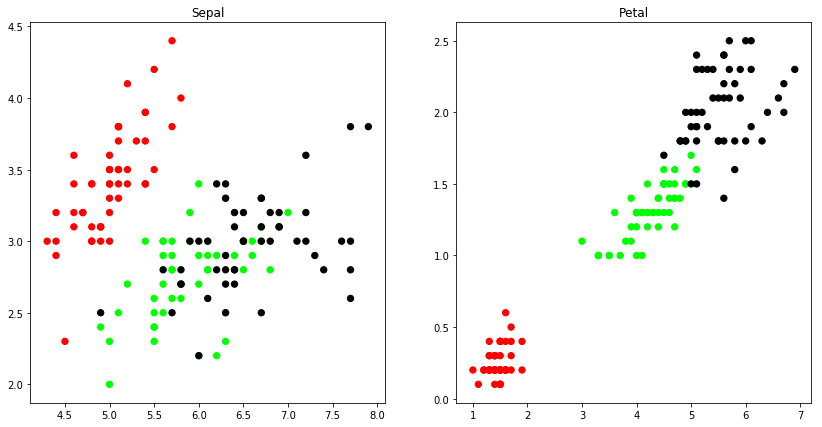

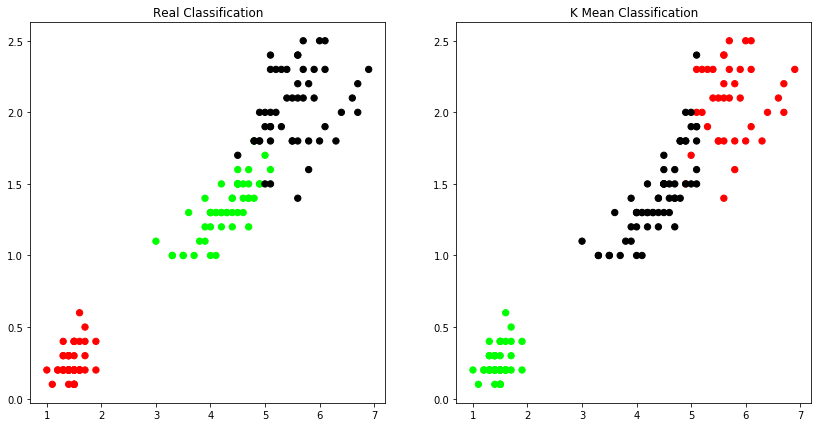

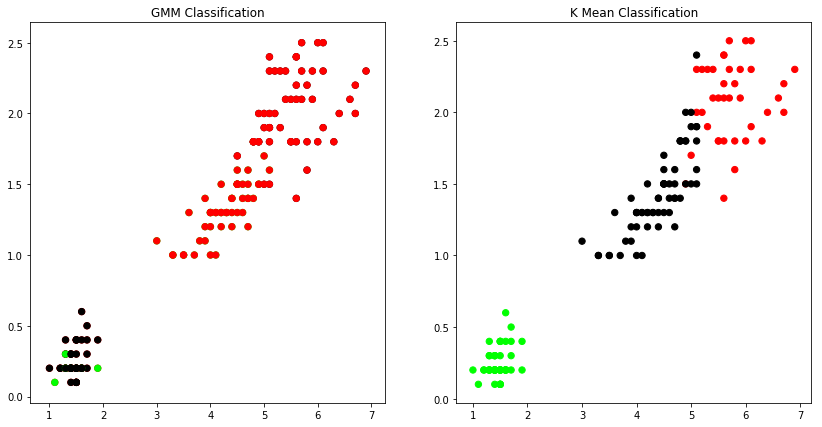

In [66]:
#Problem 8 : Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data
#set for clustering using k-Means algorithm. Compare the results of these two
#algorithms and comment on the quality of clustering. You can add Java/Python ML
#library classes/API in the program.

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
%matplotlib inline

# import some data to play with
iris = datasets.load_iris()

#print("\n IRIS DATA :",iris.data);
#print("\n IRIS FEATURES :\n",iris.feature_names)
#print("\n IRIS TARGET :\n",iris.target)
#print("\n IRIS TARGET NAMES:\n",iris.target_names)

# Store the inputs as a Pandas Dataframe and set the column names
X = pd.DataFrame(iris.data)

#print(X)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
#print(X.columns)
#print("X:",x)
#print("Y:",y)    
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

#------------------------------------------------------------------------

model = KMeans(n_clusters=3)
model.fit(X)
# This is what KMeans thought
model.labels_

#----------------------------------------------------------------------

# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

#------------------------------------------------------------------------------

# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)
print (predY)



#-------------------------------------------------------------------------

# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')


#----------------------------------------------------------------------
# Performance Metrics
sm.accuracy_score(y, predY)

#-------------------------------------------------------------------------
# Confusion Matrix
sm.confusion_matrix(y, model.labels_)

#--------------------------------------------------------------------------

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
xs.sample(5)

#-----------------------------------------------------------------------

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)


y_cluster_gmm = gmm.predict(xs)
y_cluster_gmm



plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')


sm.accuracy_score(y, y_cluster_gmm)


# Confusion Matrix
sm.confusion_matrix(y, y_cluster_gmm)

In [67]:
#Problem 9: Write a program to implement k-Nearest Neighbour algorithm to classify the iris
#data set. Print both correct and wrong predictions. Java/Python ML library classes can
#be used for this problem.


 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
iris_dataset=load_iris()

print("\n IRIS FEATURES  TARGET NAMES: \n ", iris_dataset.target_names)
for i in range(len(iris_dataset.target_names)):
    print("\n[{0}]:[{1}]".format(i,iris_dataset.target_names[i]))

#print("\n IRIS DATA :\n",iris_dataset["data"])
 
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"], random_state=0)
 
"""print("\n Target :\n",iris_dataset["target"])
print("\n X TRAIN \n", X_train)
print("\n X TEST \n", X_test)
print("\n Y TRAIN \n", y_train)
print("\n Y TEST \n", y_test)"""
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train, y_train)
 
x_new = np.array([[5, 2.9, 1, 0.2]])
print("\n XNEW \n",x_new)
   
prediction = kn.predict(x_new)
 
print("\n Predicted target value: {}\n".format(prediction))
print("\n Predicted feature name: {}\n".format (iris_dataset["target_names"][prediction]))

i=1
x= X_test[i]
x_new = np.array([x])
print("\n XNEW \n",x_new)

for i in range(len(X_test)):
    x = X_test[i]
    x_new = np.array([x])
    prediction = kn.predict(x_new)
    print("\n Actual : {0} {1}, Predicted :{2}{3}".format(y_test[i],
        iris_dataset["target_names"][y_test[i]],prediction,iris_dataset["target_names"][prediction]))

print("\n TEST SCORE[ACCURACY]: {:.2f}\n".format(kn.score(X_test, y_test)))


 IRIS FEATURES  TARGET NAMES: 
  ['setosa' 'versicolor' 'virginica']

[0]:[setosa]

[1]:[versicolor]

[2]:[virginica]

 XNEW 
 [[5.  2.9 1.  0.2]]

 Predicted target value: [0]


 Predicted feature name: ['setosa']


 XNEW 
 [[6.  2.2 4.  1. ]]

 Actual : 2 virginica, Predicted :[2]['virginica']

 Actual : 1 versicolor, Predicted :[1]['versicolor']

 Actual : 0 setosa, Predicted :[0]['setosa']

 Actual : 2 virginica, Predicted :[2]['virginica']

 Actual : 0 setosa, Predicted :[0]['setosa']

 Actual : 2 virginica, Predicted :[2]['virginica']

 Actual : 0 setosa, Predicted :[0]['setosa']

 Actual : 1 versicolor, Predicted :[1]['versicolor']

 Actual : 1 versicolor, Predicted :[1]['versicolor']

 Actual : 1 versicolor, Predicted :[1]['versicolor']

 Actual : 2 virginica, Predicted :[2]['virginica']

 Actual : 1 versicolor, Predicted :[1]['versicolor']

 Actual : 1 versicolor, Predicted :[1]['versicolor']

 Actual : 1 versicolor, Predicted :[1]['versicolor']

 Actual : 1 versicolor, Predi